## Dataset Description:

Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed from the data itself:

Group 1: 367 instances (January 1989)
Group 2: 70 instances (October 1989)
Group 3: 31 instances (February 1990)
Group 4: 17 instances (April 1990)
Group 5: 48 instances (August 1990)
Group 6: 49 instances (Updated January 1991)
Group 7: 31 instances (June 1991) 
Group 8: 86 instances (November 1991)


Total: 699 points (as of the donated datbase on 15 July 1992)

Note that the results summarized above in Past Usage refer to a dataset of size 369, while Group 1 has only 367 instances. This is because it originally contained 369 instances; 2 were removed. The following statements summarizes changes to the original Group 1's set of data:

Attribute Information:
-----------------------------------------

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)


## Step 1:

#### First of all we start with importing required modules for modelling .  After that we import Dataset

In [2]:
# importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns

#ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier as xgbc
from sklearn.model_selection import train_test_split

#ignore warning
import warnings as wrn
wrn.filterwarnings('ignore')

In [3]:
#import dataset 
df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                        699 non-null int64
clump_thickness           699 non-null int64
unif_cell_size            699 non-null int64
unif_cell_shape           699 non-null int64
marg_adhesion             699 non-null int64
single_epith_cell_size    699 non-null int64
bare_nuclie               699 non-null object
bland_chrom               699 non-null int64
norm_nucleoli             699 non-null int64
mitoses                   699 non-null int64
class                     699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


#### from df.info() we get that bare_nuclie is object dtype so it has to be dropped
#### And data column - id is useless 

In [4]:
#droping useless features
df.drop(['id'], axis=1, inplace=True)

## Step 2: 
#### After removing useless features we then plot correlation heatmap to find out relation between features and target data column - class

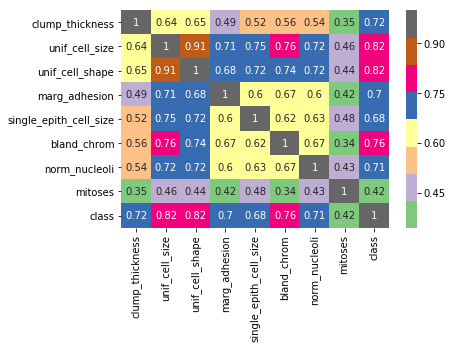

In [5]:
#using correlation heatmap and pairplot we finding out relation between various features and target column
sns.heatmap(data=df.corr(), annot=True, cmap = 'Accent')

In [6]:
# removing non numeric values from data column - bare_nuclie
df = df[df.bare_nuclie.apply(lambda x: x.isnumeric())]

#### From correlation heatmap it is concluded that the data column - mitosis is useless and taking threshold correlation score as 0.70 we also remove data column - single_epith_cell_size 

In [7]:
#discardng mitosis and class
X = df.drop(['mitoses', 'single_epith_cell_size', 'class'], axis=1)  #, 'single_epith_cell_size'
y = df['class']

## Last Step 
#### Creating training and testing sets and predict and clculate accuracy score using various alorithms

In [8]:
#training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 20)

In [9]:
#DT
clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)
print(100 * accuracy_score(clf.predict(test_X), test_y))

100.0


In [10]:
clf = ExtraTreesClassifier()
clf.fit(train_X, train_y)
print(100 * accuracy_score(clf.predict(test_X), test_y))

100.0


In [11]:
clf = RandomForestClassifier()
clf.fit(train_X, train_y)
print(100 * accuracy_score(clf.predict(test_X), test_y))

95.0
